<a href="https://colab.research.google.com/github/profitter261/Healthcare-AI-ML-App/blob/main/senti_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/reviews[1].csv')
df.head()

,Healthcare App,Username,Content,Rating,Date
0,Mfine,shoeb ansari,Bad lab test service. Technician doesn't come ...,1,12-06-2023 15:15
1,Mfine,Hardik Shah,great user interaction and great support team.,5,12-06-2023 07:12
2,Mfine,pooja mehta,It was a very bad experience....Now I will not...,1,11-06-2023 13:54
3,Mfine,Kuldeep Verma,very nice service,5,11-06-2023 08:14
4,Mfine,Anamika Singh,Fraud people minting money,1,11-06-2023 06:27


In [ ]:
df.shape

(342687, 5)

In [ ]:
# Remove empty rows
reviews = df.dropna(axis=0, how='all')

# Remove empty columns
reviews = df.dropna(axis=1, how='all')

In [ ]:
reviews.shape

(342687, 5)

In [ ]:
app_counts = reviews['Healthcare App'].value_counts()

# Print the healthcare apps with counts greater than 1
for app, count in app_counts.items():
    if count > 1:
        print(app, ": ", count)

TATA 1mg :  179643
Apollo 24|7 :  81442
Practo :  41361
Lybrate :  21432
Mfine :  18809


In [ ]:
# Calculate the contribution percentage of each healthcare app
app_counts = reviews['Healthcare App'].value_counts()
total_entries = len(reviews)

# Calculate and print the contribution percentage for each app
for app, count in app_counts.items():
    contribution_percent = (count / total_entries) * 100
    print(app, ':', contribution_percent)

TATA 1mg : 52.42188936259618
Apollo 24|7 : 23.765710400452893
Practo : 12.069614546218562
Lybrate : 6.25410359891096
Mfine : 5.488682091821399


# Task
Perform sentiment analysis on the dataset based on positive, neutral, and negative sentiments.

## Data preprocessing

### Subtask:
Clean the text data in the 'Content' column by removing special characters, converting to lowercase, and handling any missing values.


**Reasoning**:
Fill missing values, convert to lowercase, and remove special characters from the 'Content' column.



In [ ]:
reviews['Content'] = reviews['Content'].fillna('').astype(str)
reviews['Content'] = reviews['Content'].str.lower()
reviews['Content'] = reviews['Content'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
reviews.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1606060595.py:3: SyntaxWarning: invalid escape sequence '\s'
  reviews['Content'] = reviews['Content'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


,Healthcare App,Username,Content,Rating,Date
0,Mfine,shoeb ansari,bad lab test service technician doesnt come ho...,1,12-06-2023 15:15
1,Mfine,Hardik Shah,great user interaction and great support team,5,12-06-2023 07:12
2,Mfine,pooja mehta,it was a very bad experiencenow i will not do ...,1,11-06-2023 13:54
3,Mfine,Kuldeep Verma,very nice service,5,11-06-2023 08:14
4,Mfine,Anamika Singh,fraud people minting money,1,11-06-2023 06:27


## Sentiment scoring

### Subtask:
Use a pre-trained sentiment analysis model or library to assign a sentiment score (e.g., positive, neutral, negative) to each review based on the 'Content' column.


**Reasoning**:
Import the necessary VADER sentiment analysis library and define a function to classify sentiment based on the compound score. Then, apply this function to the 'Content' column to create the 'sentiment' column.



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

reviews['sentiment'] = reviews['Content'].apply(get_sentiment)
reviews.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Healthcare App,Username,Content,Rating,Date,sentiment
0,Mfine,shoeb ansari,bad lab test service technician doesnt come ho...,1,12-06-2023 15:15,negative
1,Mfine,Hardik Shah,great user interaction and great support team,5,12-06-2023 07:12,positive
2,Mfine,pooja mehta,it was a very bad experiencenow i will not do ...,1,11-06-2023 13:54,negative
3,Mfine,Kuldeep Verma,very nice service,5,11-06-2023 08:14,positive
4,Mfine,Anamika Singh,fraud people minting money,1,11-06-2023 06:27,negative


## Sentiment distribution analysis

### Subtask:
Analyze the distribution of sentiment scores across all reviews and for each healthcare app to understand the overall sentiment and compare the sentiment for different apps.


**Reasoning**:
Calculate and display the overall and app-specific sentiment distributions.



In [ ]:
overall_sentiment_distribution = reviews['sentiment'].value_counts()
app_sentiment_distribution = reviews.groupby('Healthcare App')['sentiment'].value_counts()

print("Overall Sentiment Distribution:")
display(overall_sentiment_distribution)

print("\nSentiment Distribution by Healthcare App:")
display(app_sentiment_distribution)

Overall Sentiment Distribution:


,count
sentiment,
positive,237042
negative,57655
neutral,47990



Sentiment Distribution by Healthcare App:


Healthcare App  sentiment
Apollo 24|7     positive      47833
                negative      21315
                neutral       12294
Lybrate         positive      15323
                neutral        3844
                negative       2265
Mfine           positive      12616
                negative       3880
                neutral        2313
Practo          positive      26700
                negative       8920
                neutral        5741
TATA 1mg        positive     134570
                neutral       23798
                negative      21275
Name: count, dtype: int64

## Visualize sentiment trends

### Subtask:
Create visualizations, such as bar charts or pie charts, to represent the sentiment distribution.


**Reasoning**:
Create bar plots to visualize the overall and app-wise sentiment distributions.



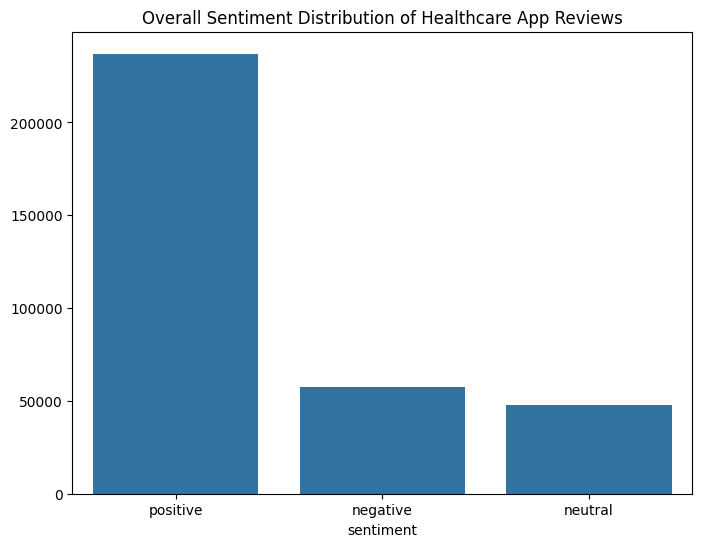

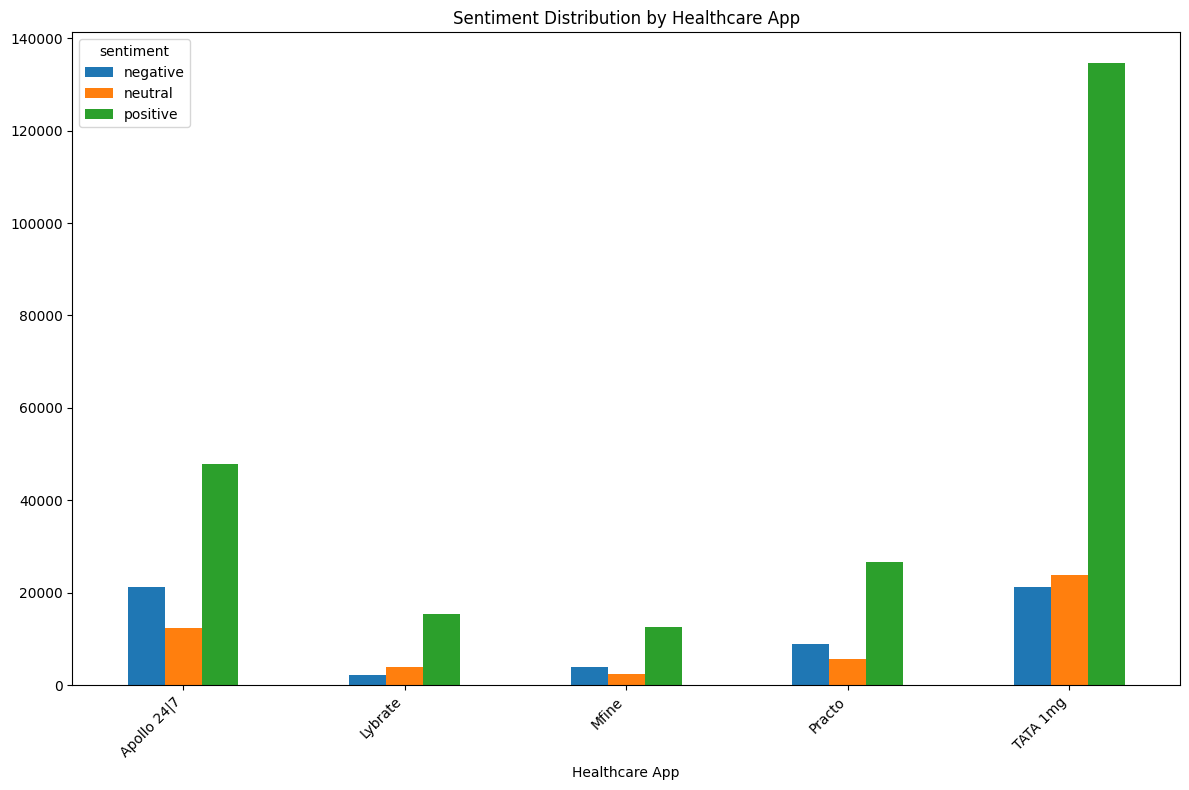

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the overall sentiment bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=overall_sentiment_distribution.index, y=overall_sentiment_distribution.values)
plt.title("Overall Sentiment Distribution of Healthcare App Reviews")
plt.show()

# Create the app-wise sentiment bar plot
app_sentiment_df = app_sentiment_distribution.unstack()
app_sentiment_df.plot(kind='bar', figsize=(12, 8))
plt.title("Sentiment Distribution by Healthcare App")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Perform sentiment analysis on the dataset using the 'Content' and 'Rating' columns, train multiple models including Multinomial Naive Bayes, and select the best performing model.

## Data preparation

### Subtask:
Prepare the data for model training by splitting it into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the 'Content' column as features and the 'sentiment' column as the target variable.



In [ ]:
from sklearn.model_selection import train_test_split

X = reviews['Content']
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature engineering

### Subtask:
Convert the 'Content' column into numerical features using techniques like TF-IDF or word embeddings.


**Reasoning**:
Convert the 'Content' column into numerical features using TF-IDF.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Model selection

### Subtask:
Choose suitable classification models for sentiment analysis, including Multinomial Naive Bayes.


**Reasoning**:
Import Multinomial Naive Bayes and other suitable classification models for sentiment analysis.



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Model training

### Subtask:
Train the selected models on the training data.


**Reasoning**:
Instantiate and train the selected classification models using the TF-IDF transformed training data.



In [ ]:
mnb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
lsvc_model = LinearSVC()
dt_model = DecisionTreeClassifier()

mnb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
lsvc_model.fit(X_train_tfidf, y_train)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

## Model evaluation

### Subtask:
Evaluate the performance of all trained models using appropriate metrics.


**Reasoning**:
Import evaluation metrics, create a dictionary to store results, evaluate each model, and print the results.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_evaluation = {}

models = {
    'Multinomial Naive Bayes': mnb_model,
    'Logistic Regression': lr_model,
    'Linear SVC': lsvc_model,
    'Decision Tree Classifier': dt_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_evaluation[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

print("Model Evaluation Results:")
for name, metrics in model_evaluation.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Evaluation Results:

Multinomial Naive Bayes:
  Accuracy: 0.8250
  Precision: 0.8341
  Recall: 0.8250
  F1-score: 0.7950

Logistic Regression:
  Accuracy: 0.9572
  Precision: 0.9573
  Recall: 0.9572
  F1-score: 0.9572

Linear SVC:
  Accuracy: 0.9600
  Precision: 0.9600
  Recall: 0.9600
  F1-score: 0.9600

Decision Tree Classifier:
  Accuracy: 0.9264
  Precision: 0.9264
  Recall: 0.9264
  F1-score: 0.9264


## Model comparison and selection

### Subtask:
Compare the performance of the models and select the best-performing one.


**Reasoning**:
Identify the best performing model by comparing the evaluation metrics and print the results.



In [ ]:
best_model_name = None
best_f1_score = -1

for name, metrics in model_evaluation.items():
    if metrics['F1-score'] > best_f1_score:
        best_f1_score = metrics['F1-score']
        best_model_name = name

print(f"The best performing model is: {best_model_name}")
print(f"Performance metrics for the best model:")
for metric, value in model_evaluation[best_model_name].items():
    print(f"  {metric}: {value:.4f}")

The best performing model is: Linear SVC
Performance metrics for the best model:
  Accuracy: 0.9600
  Precision: 0.9600
  Recall: 0.9600
  F1-score: 0.9600


## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training and testing sets using `train_test_split`, with 80% for training and 20% for testing.
*   The 'Content' column was transformed into numerical features using `TfidfVectorizer`.
*   Four classification models were trained for sentiment analysis: Multinomial Naive Bayes, Logistic Regression, Linear SVC, and Decision Tree Classifier.
*   Model evaluation using accuracy, precision, recall, and F1-score showed varying performance across models.
*   Based on the F1-score, the Linear SVC model was identified as the best-performing model with an F1-score of 0.9600. Logistic Regression also performed well with an F1-score of 0.9572, while Multinomial Naive Bayes had the lowest F1-score of 0.7950.

### Insights or Next Steps

*   The Linear SVC model is the most effective among the tested models for this sentiment analysis task.
*   Further hyperparameter tuning for the Linear SVC model could potentially improve performance.


## Save the best model

### Subtask:
Save the best performing model to a file for future use.

**Reasoning**:
Import the `joblib` library and save the best performing model to a file named `best_sentiment_model.joblib`.

In [ ]:
import joblib

# Assuming 'best_model_name' and 'models' dictionary are available from previous steps
best_model = models[best_model_name]

# Save the best model to a file
joblib.dump(best_model, 'best_sentiment_model.joblib')

# Save the vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print(f"Best model '{best_model_name}' saved to 'best_sentiment_model.joblib'")
print(f"TF-IDF vectorizer saved to 'tfidf_vectorizer.joblib'")

Best model 'Linear SVC' saved to 'best_sentiment_model.joblib'
TF-IDF vectorizer saved to 'tfidf_vectorizer.joblib'
